In [1]:
# Importing Liberies
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
data = pd.read_csv('marketing_campaign.csv',sep="\t" )
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
print('Number of datapoints in the dataset: ', len(data))
print('Number of rows {} and columns {}:' .format(data.shape[0],data.shape[1]))
print('Column names:', data.columns)


Number of datapoints in the dataset:  2240
Number of rows 2240 and columns 29:
Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [5]:
data.head() 

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Removing missing values
data = data.dropna()
print("Number of data-points after removing the rows with missing values:", len(data))

Number of data-points after removing the rows with missing values: 2216


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [9]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [10]:
# Dt_customer data type is Object
# Changing format of datetime in Dt_Customer (04-09-2012 --> 2012-09-04)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates = [] 
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print("The newest customer's date in the records:",max(dates))
print("The oldest customer's date in the records:",min(dates))

The newest customer's date in the records: 2014-12-06
The oldest customer's date in the records: 2012-01-08


In [11]:
data['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [12]:
type(dates)

list

In [13]:
dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 8, 29),
 datetime.d

In [14]:
max(dates)

datetime.date(2014, 12, 6)

In [15]:
dates[0]

datetime.date(2012, 4, 9)

In [16]:
max(dates)-dates[0]

datetime.timedelta(days=971)

In [17]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)


# Creating a feature ("Customer_Days") of the number of days the customers started to shop in the store relative to the last recorded date
data["Customer_Days"] = days
print(data[['ID','Dt_Customer','Customer_Days']])

print("*******************************")
print(data.info())
print("*******************************")

# Converting days into numerical
data["Customer_Days"] = pd.to_numeric(data["Customer_Days"], errors="coerce")
print('***************************************')
print('After Creating days into numerical')
print(data[['ID','Dt_Customer','Customer_Days']])

print("*******************************")
print(data.info())
print("*******************************")

         ID Dt_Customer Customer_Days
0      5524  2012-04-09      971 days
1      2174  2014-08-03      125 days
2      4141  2013-08-21      472 days
3      6182  2014-10-02       65 days
4      5324  2014-01-19      321 days
...     ...         ...           ...
2235  10870  2013-06-13      541 days
2236   4001  2014-10-06       61 days
2237   7270  2014-01-25      315 days
2238   8235  2014-01-24      316 days
2239   9405  2012-10-15      782 days

[2216 rows x 3 columns]
*******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2216 non-null   int64          
 1   Year_Birth           2216 non-null   int64          
 2   Education            2216 non-null   object         
 3   Marital_Status       2216 non-null   object         
 4   Income               2216 n

In [18]:
# Creating new feature Age
# Age of customer today 
data["Age"] = 2021-data["Year_Birth"]
print(data[['ID','Year_Birth','Dt_Customer','Age']])

         ID  Year_Birth Dt_Customer  Age
0      5524        1957  2012-04-09   64
1      2174        1954  2014-08-03   67
2      4141        1965  2013-08-21   56
3      6182        1984  2014-10-02   37
4      5324        1981  2014-01-19   40
...     ...         ...         ...  ...
2235  10870        1967  2013-06-13   54
2236   4001        1946  2014-10-06   75
2237   7270        1981  2014-01-25   40
2238   8235        1956  2014-01-24   65
2239   9405        1954  2012-10-15   67

[2216 rows x 4 columns]


In [19]:
#Create another feature "Money_Spent" indicating the total amount spent by the customer in various categories over the span of two years

data["Money_Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ \
                              data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
                      
print(data[['ID','Year_Birth','Dt_Customer','Age','Money_Spent']])

         ID  Year_Birth Dt_Customer  Age  Money_Spent
0      5524        1957  2012-04-09   64         1617
1      2174        1954  2014-08-03   67           27
2      4141        1965  2013-08-21   56          776
3      6182        1984  2014-10-02   37           53
4      5324        1981  2014-01-19   40          422
...     ...         ...         ...  ...          ...
2235  10870        1967  2013-06-13   54         1341
2236   4001        1946  2014-10-06   75          444
2237   7270        1981  2014-01-25   40         1241
2238   8235        1956  2014-01-24   65          843
2239   9405        1954  2012-10-15   67          172

[2216 rows x 5 columns]


In [20]:
# Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                                    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
print(data[['ID','Year_Birth','Dt_Customer','Age','Money_Spent','Living_With']])

         ID  Year_Birth Dt_Customer  Age  Money_Spent Living_With
0      5524        1957  2012-04-09   64         1617       Alone
1      2174        1954  2014-08-03   67           27       Alone
2      4141        1965  2013-08-21   56          776     Partner
3      6182        1984  2014-10-02   37           53     Partner
4      5324        1981  2014-01-19   40          422     Partner
...     ...         ...         ...  ...          ...         ...
2235  10870        1967  2013-06-13   54         1341     Partner
2236   4001        1946  2014-10-06   75          444     Partner
2237   7270        1981  2014-01-25   40         1241       Alone
2238   8235        1956  2014-01-24   65          843     Partner
2239   9405        1954  2012-10-15   67          172     Partner

[2216 rows x 6 columns]


In [21]:
# Creating a feature "Children" --> total children in a household that is, kids and teenagers.
data["Children"]=data["Kidhome"]+data["Teenhome"]
print(data[['ID','Year_Birth','Dt_Customer','Age','Money_Spent','Living_With','Children']])

         ID  Year_Birth Dt_Customer  Age  Money_Spent Living_With  Children
0      5524        1957  2012-04-09   64         1617       Alone         0
1      2174        1954  2014-08-03   67           27       Alone         2
2      4141        1965  2013-08-21   56          776     Partner         0
3      6182        1984  2014-10-02   37           53     Partner         1
4      5324        1981  2014-01-19   40          422     Partner         1
...     ...         ...         ...  ...          ...         ...       ...
2235  10870        1967  2013-06-13   54         1341     Partner         1
2236   4001        1946  2014-10-06   75          444     Partner         3
2237   7270        1981  2014-01-25   40         1241       Alone         0
2238   8235        1956  2014-01-24   65          843     Partner         1
2239   9405        1954  2012-10-15   67          172     Partner         2

[2216 rows x 7 columns]


In [22]:
# Creating feature indicating "Family_Size" --> To get further clarity of household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
print(data[['ID','Year_Birth','Age','Money_Spent','Living_With','Children','Family_Size']])

         ID  Year_Birth  Age  Money_Spent Living_With  Children  Family_Size
0      5524        1957   64         1617       Alone         0            1
1      2174        1954   67           27       Alone         2            3
2      4141        1965   56          776     Partner         0            2
3      6182        1984   37           53     Partner         1            3
4      5324        1981   40          422     Partner         1            3
...     ...         ...  ...          ...         ...       ...          ...
2235  10870        1967   54         1341     Partner         1            3
2236   4001        1946   75          444     Partner         3            5
2237   7270        1981   40         1241       Alone         0            1
2238   8235        1956   65          843     Partner         1            3
2239   9405        1954   67          172     Partner         2            4

[2216 rows x 7 columns]


In [23]:
# Creating feature "Is_Parent"-->parenthood status
#np.where(condition, if-true, if-false)
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)   

print(data[['ID','Age','Living_With','Children','Family_Size','Is_Parent']])

         ID  Age Living_With  Children  Family_Size  Is_Parent
0      5524   64       Alone         0            1          0
1      2174   67       Alone         2            3          1
2      4141   56     Partner         0            2          0
3      6182   37     Partner         1            3          1
4      5324   40     Partner         1            3          1
...     ...  ...         ...       ...          ...        ...
2235  10870   54     Partner         1            3          1
2236   4001   75     Partner         3            5          1
2237   7270   40       Alone         0            1          0
2238   8235   65     Partner         1            3          1
2239   9405   67     Partner         2            4          1

[2216 rows x 6 columns]


In [24]:
#creating three categories in the "Education" by simplifying its value counts
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

print(data[['ID','Age','Money_Spent','Living_With','Children','Family_Size','Is_Parent','Education']])

         ID  Age  Money_Spent Living_With  Children  Family_Size  Is_Parent  \
0      5524   64         1617       Alone         0            1          0   
1      2174   67           27       Alone         2            3          1   
2      4141   56          776     Partner         0            2          0   
3      6182   37           53     Partner         1            3          1   
4      5324   40          422     Partner         1            3          1   
...     ...  ...          ...         ...       ...          ...        ...   
2235  10870   54         1341     Partner         1            3          1   
2236   4001   75          444     Partner         3            5          1   
2237   7270   40         1241       Alone         0            1          0   
2238   8235   65          843     Partner         1            3          1   
2239   9405   67          172     Partner         2            4          1   

         Education  
0         Graduate  
1        

In [25]:
data.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate       Together  71613.0        0         0   
3  6182        1984      Graduate       Together  26646.0        1         0   
4  5324        1981  Postgraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-04-09       58       635  ...              3         11         1   
1  2014-08-03       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-10-02       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

       Customer_Days  Age  Money_Spent  Living_With  Children  Family_Size  \
0  83894400000000000   64         1617        Alone         0            1   
1  10800000000000000   67           27        Alone         2            3   
2  40780800000000000   56          776      Partner         0            2   
3   5616000000000000   37           53      Partner         1            3   
4  27734400000000000   40          422      Partner         1            3   

   Is_Parent  
0          0  
1          1  
2          0  
3          1  
4          1  

[5 rows x 36 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [27]:
# Changing some feature name for clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
drop_it = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(drop_it, axis=1)
print('size of dataset now: ', data.shape)

size of dataset now:  (2216, 30)


In [28]:
# After dropping some feature
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response      Customer_Days  \
0   172      88  ...             0         0         1  83894400000000000   
1     2       1  ...             0         0         0  10800000000000000   
2   111      21  ...             0         0         0  40780800000000000   
3    10       3  ...             0         0         0   5616000000000000   
4    46      27  ...             0         0         0  27734400000000000   

   Age  Money_Spent  Living_With  Children  Family_Size  Is_Parent  
0   64         1617        Alone         0            1          0  
1   67           27        Alone         2            3          1  
2   56          776      Partner         0            2          0  
3   37           53      Partner         1            3          1  
4   40          422      Partner         1            3          1  

[5 rows x 30 columns]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [30]:
# Now we have some new features let's have a look at the data's stats.
data.describe()


Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_Days  \
count   2216.000000   2216.000000  2216.000000  2216.000000   2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271   4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417   2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000   0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000   2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000   4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000   5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000   9.184320e+16   

               Age  Money_Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

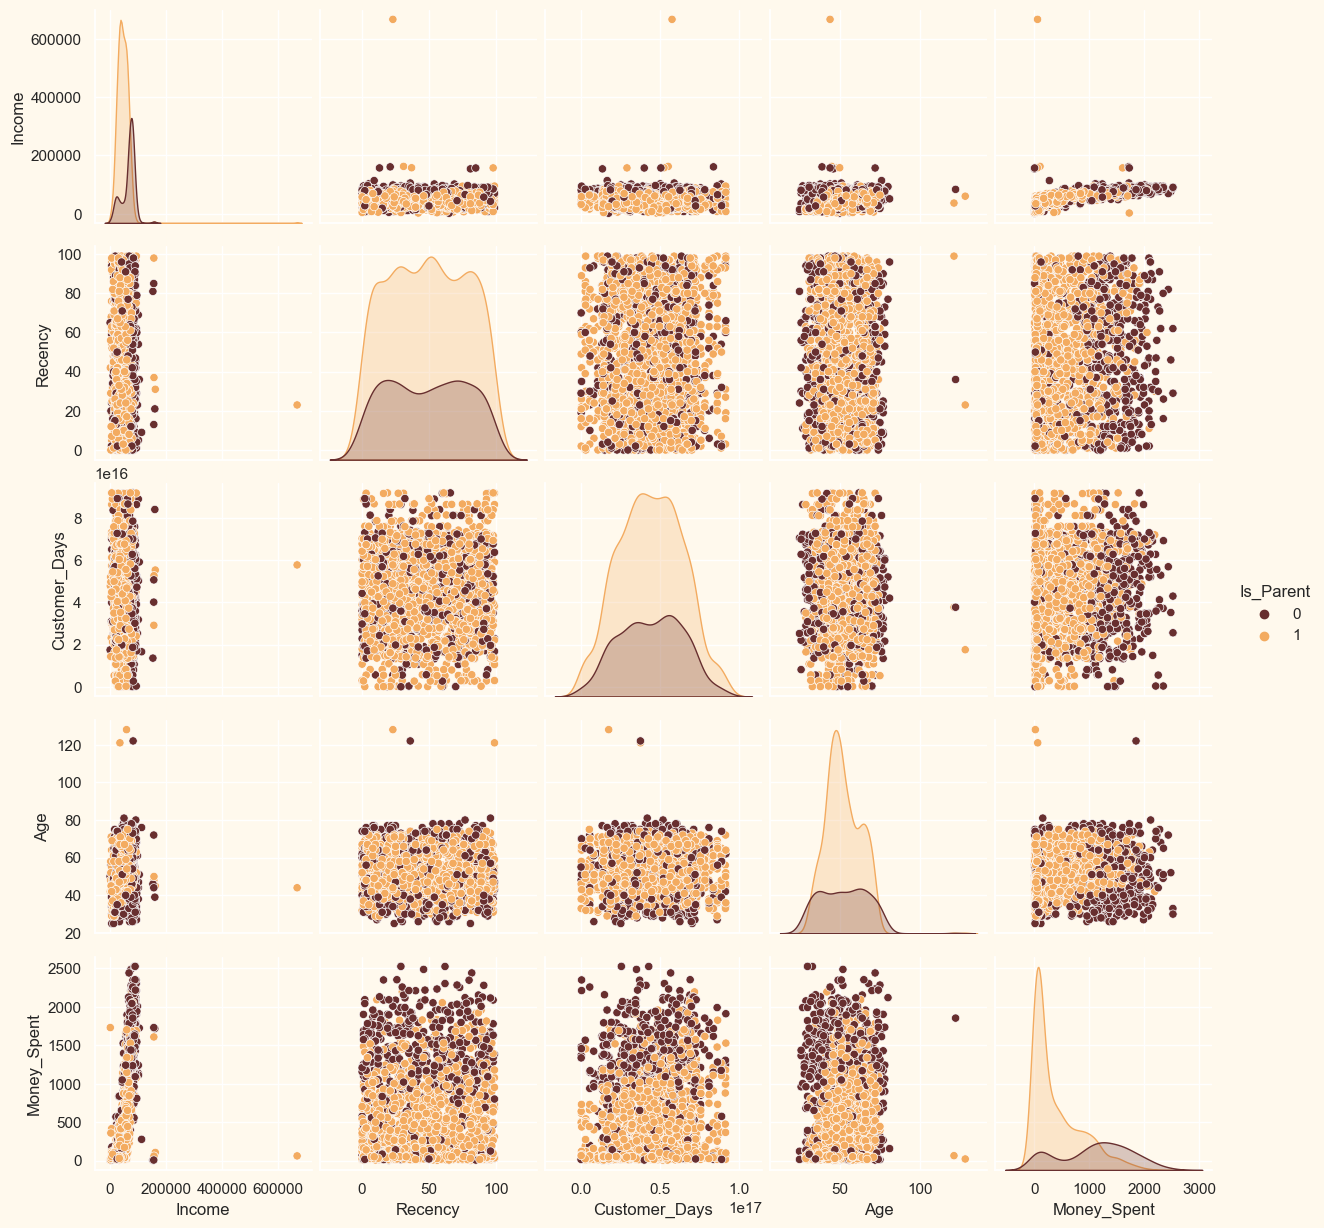

In [31]:
#plotting some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]      #https://www.imgonline.com.ua/eng/color-palette.php
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
plot_for = [ "Income", "Recency", "Customer_Days", "Age", "Money_Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[plot_for], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [32]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers:", len(data))

The total number of data-points after removing the outliers: 2212


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

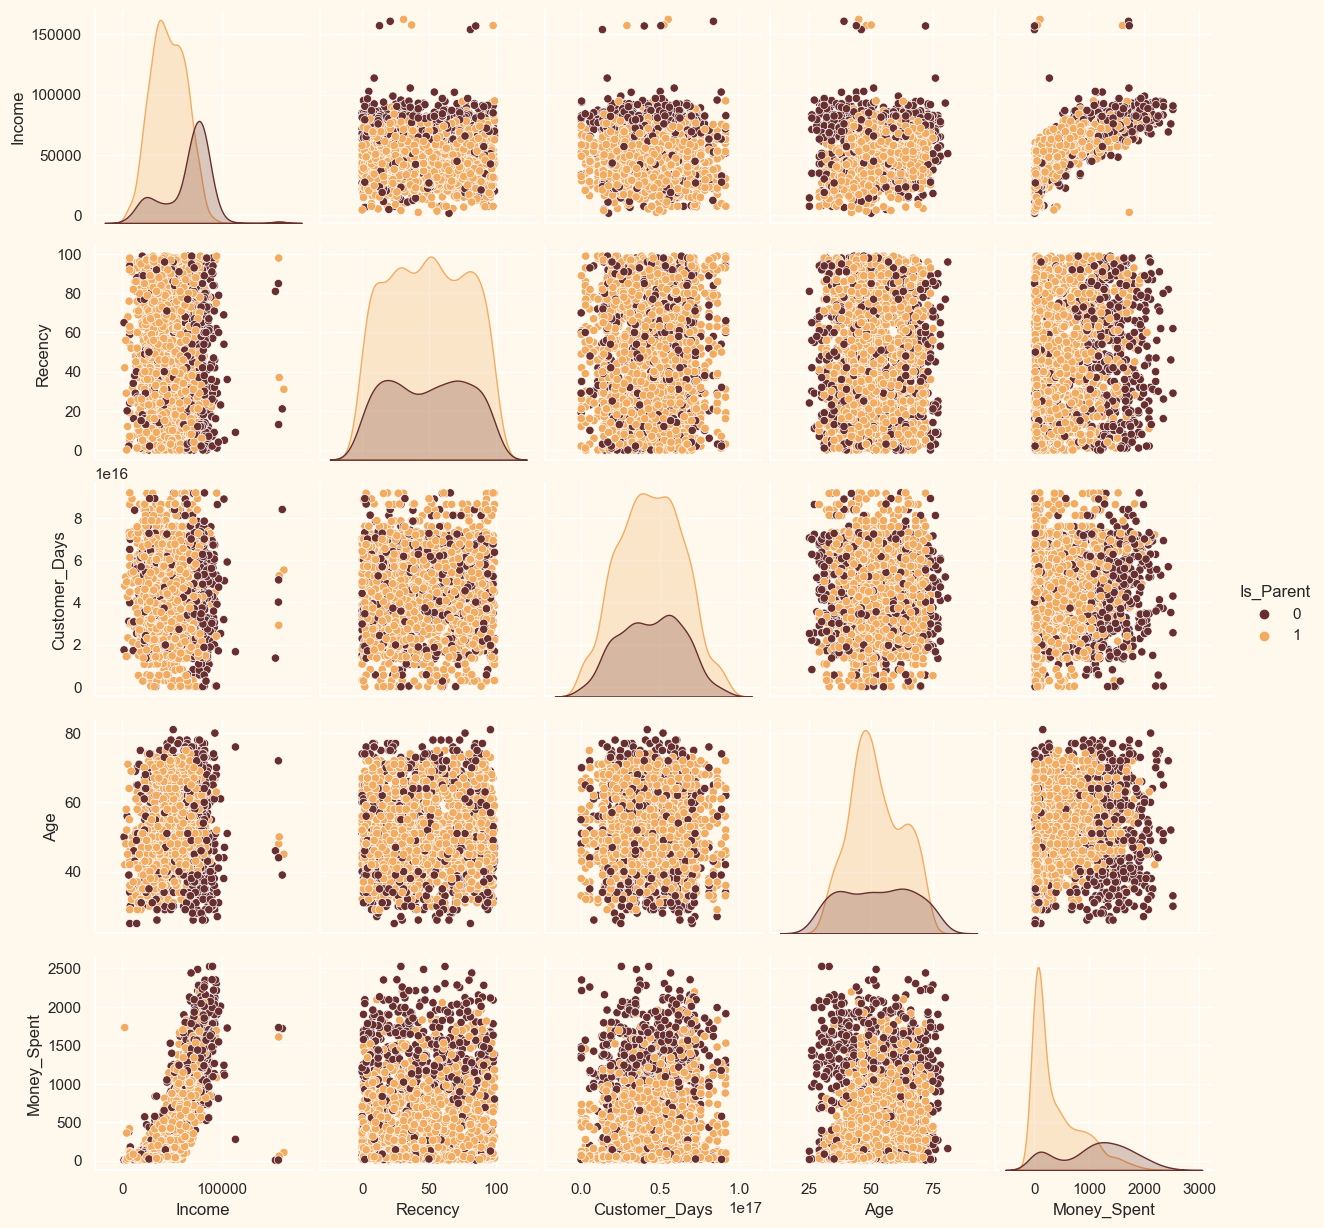

In [33]:
#plotting some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]      #https://www.imgonline.com.ua/eng/color-palette.php
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
plot_for = [ "Income", "Recency", "Customer_Days", "Age", "Money_Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[plot_for], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

<AxesSubplot:>

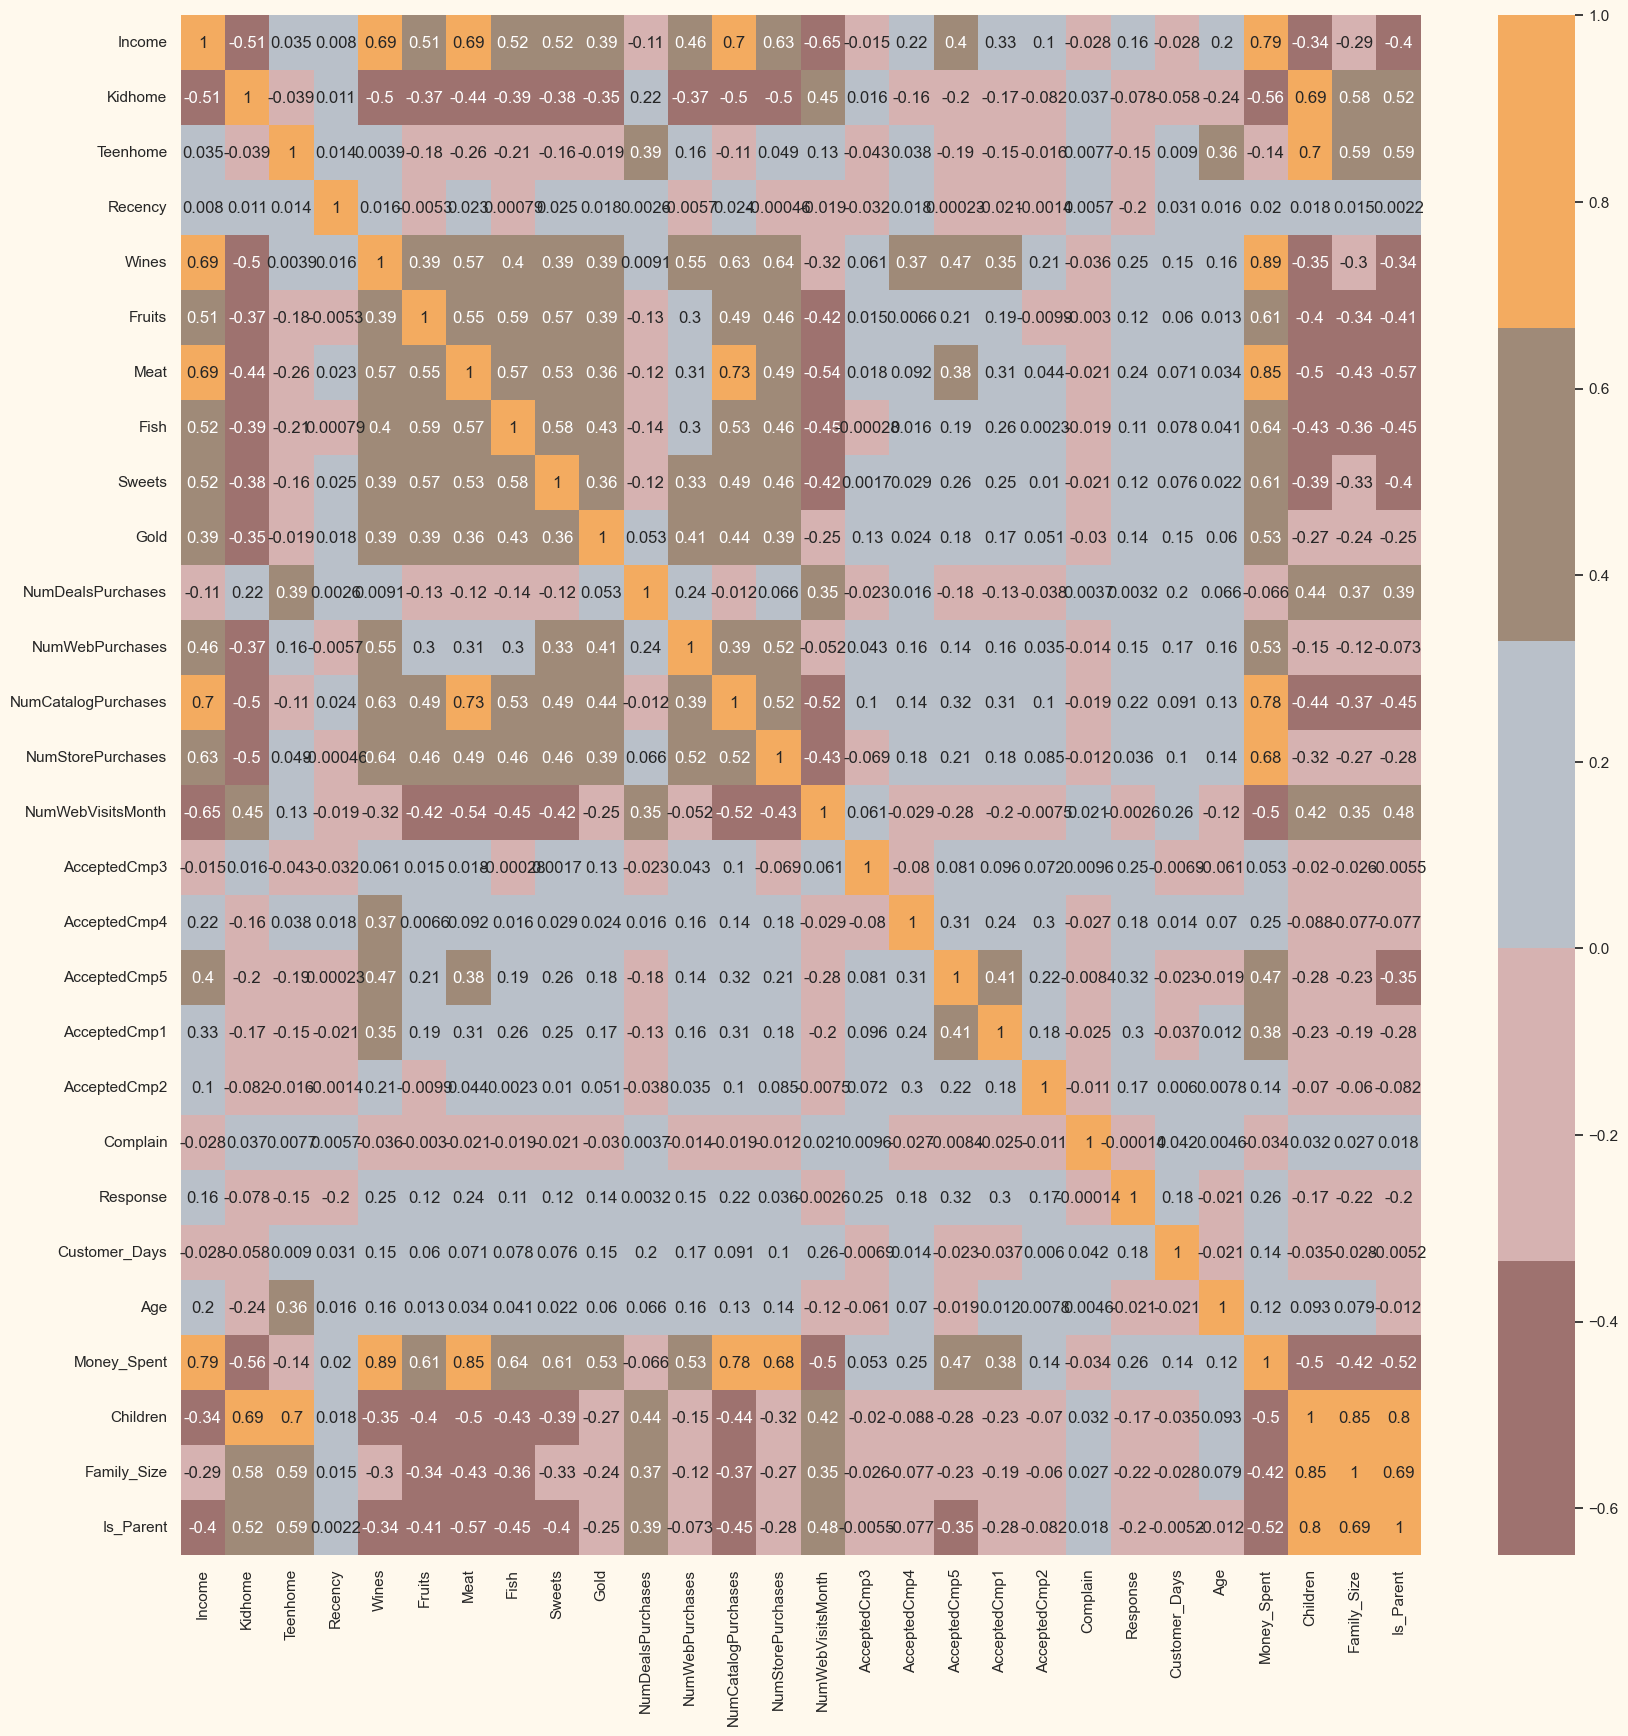

In [34]:
# Checkking correlation amongst the features. (Excluding the categorical attributes at this point)
# Correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [35]:
# Getting list of categorical variables
## variable cv contains the names of coulmns whose data type is object
cv = (data.dtypes == 'object')
cat_var = list(cv[cv].index)

print("Categorical variables in the dataset:", cat_var)

Categorical variables in the dataset: ['Education', 'Living_With']


In [36]:
cv[cv].index

Index(['Education', 'Living_With'], dtype='object')

In [37]:
print('Before label encoding')
print(data[['Education', 'Living_With']])

# Label Encoding the object dtypes.
LE=LabelEncoder()
for i in  cat_var:
    data[i]=data[[i]].apply(LE.fit_transform)
print('********************************')
print('After label encoding')
print(data[['Education', 'Living_With']])

Before label encoding
         Education Living_With
0         Graduate       Alone
1         Graduate       Alone
2         Graduate     Partner
3         Graduate     Partner
4     Postgraduate     Partner
...            ...         ...
2235      Graduate     Partner
2236  Postgraduate     Partner
2237      Graduate       Alone
2238  Postgraduate     Partner
2239  Postgraduate     Partner

[2212 rows x 2 columns]
********************************
After label encoding
      Education  Living_With
0             0            0
1             0            0
2             0            1
3             0            1
4             1            1
...         ...          ...
2235          0            1
2236          1            1
2237          0            0
2238          1            1
2239          1            1

[2212 rows x 2 columns]


In [38]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [39]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_Days       Age  Money_Spent  Living_With  \
0           0.692181       1.973583  1.018352     1.676245    -1.349603   
1          -0.132545      -1.665144  1.274785    -0.963297    -1.349603   
2          -0.544908      -0.172664  0.334530     0.280110     0.740959   
3           0.279818      -1.923210 -1.289547    -0.920135     0.740959   
4          -0.132545      -0.822130 -1.033114    -0.307562     0.740959   

   Children  Family_Size  Is_Parent  
0 -1.264598    -1.758359  -1.581139  
1  1.404572     0.449070   0.632456  
2 -1.264598    -0.654644  -1.581139  
3  0.069987     0.449070   0.632456  
4  0.069987     0.449070   0.632456  

[5 rows x 23 columns]

In [40]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  3.192142e-17  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0 -5.360390e-17  1.706839 -4.312196 -1.328316 -0.158123  1.242289   
col3  2212.0  7.295249e-17  1.221956 -3.530416 -0.829067 -0.022692  0.799895   

           max  
col1  7.444305  
col2  6.142721  
col3  6.611222

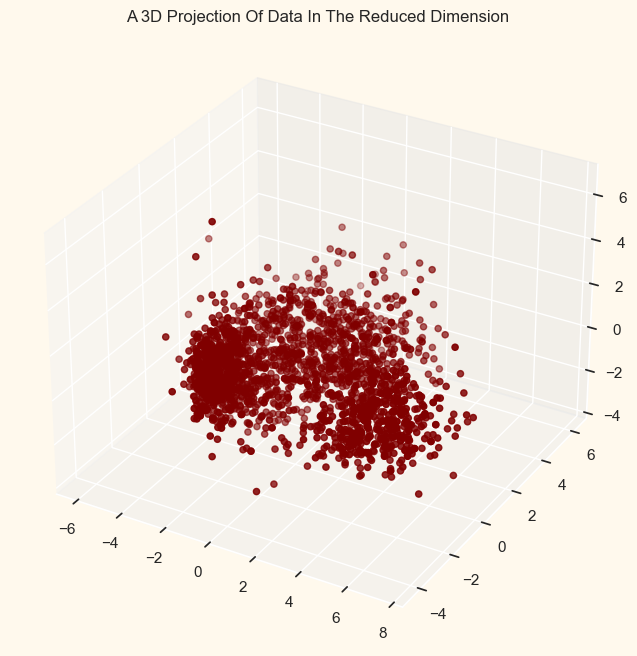

In [41]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [46]:
!pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 355.6 kB/s eta 0:00:00


In [48]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


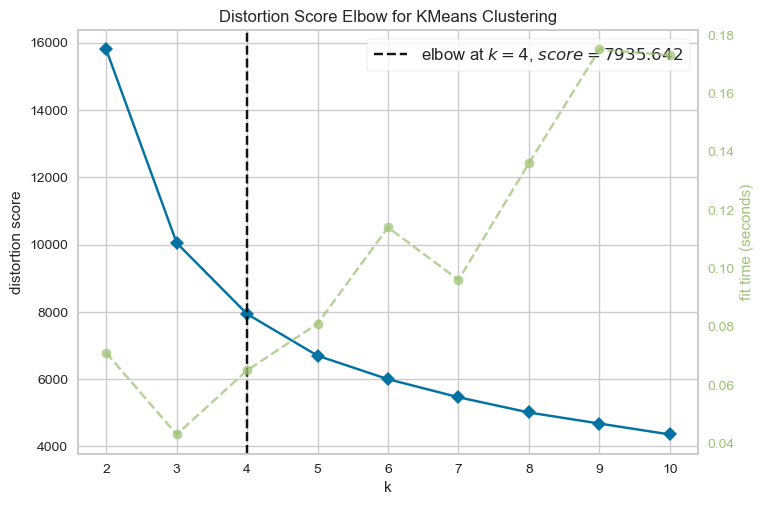

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [50]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

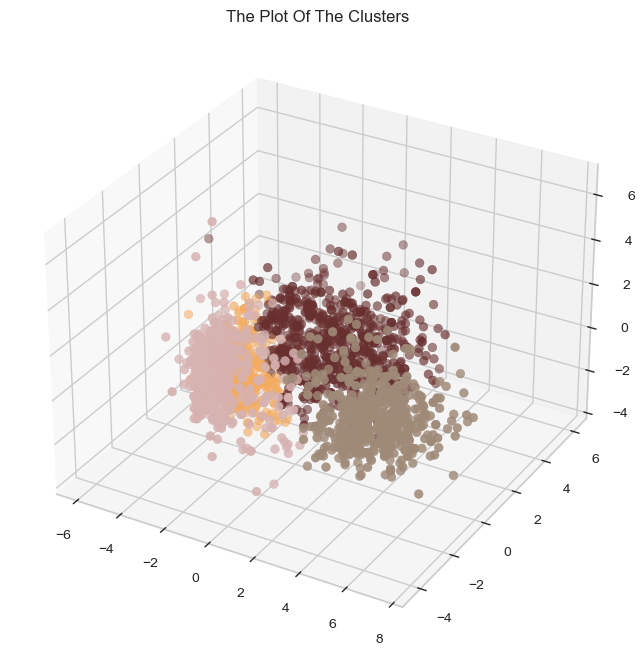

In [51]:
# to examine the clusters formed plotting 3-D distribution of the clusters.
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

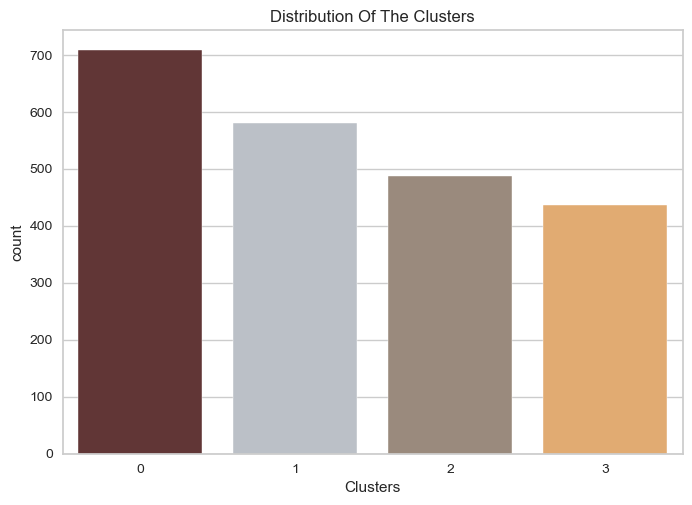

In [52]:
# Plotting group distribution of clustring
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

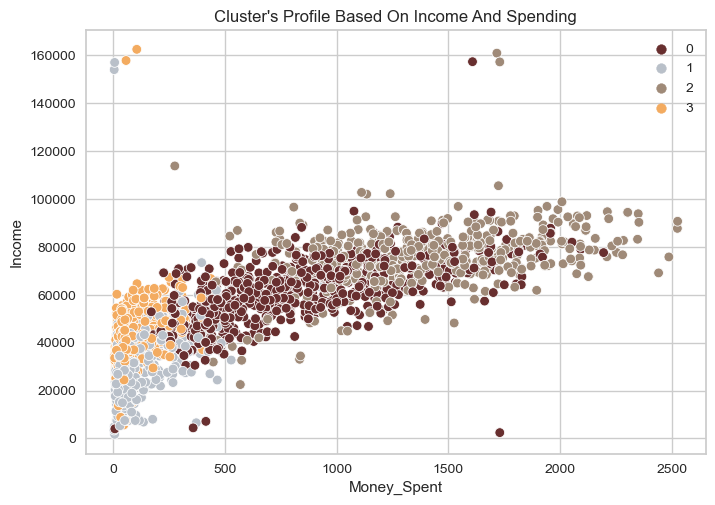

In [53]:
pl = sns.scatterplot(data = data,x=data["Money_Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

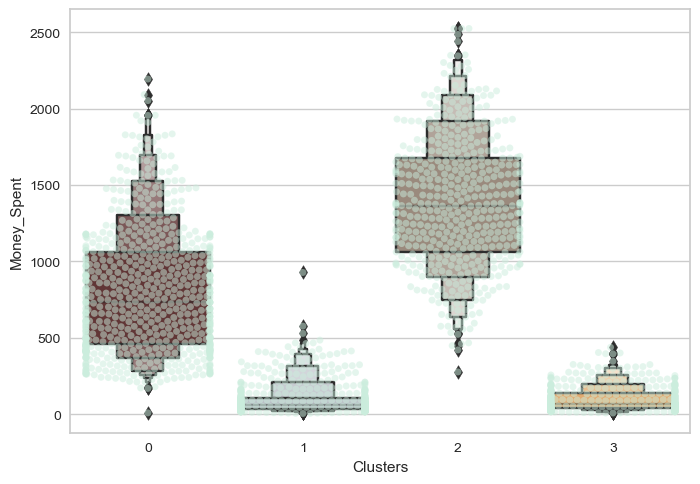

In [54]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Money_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Money_Spent"], palette=pal)
plt.show()

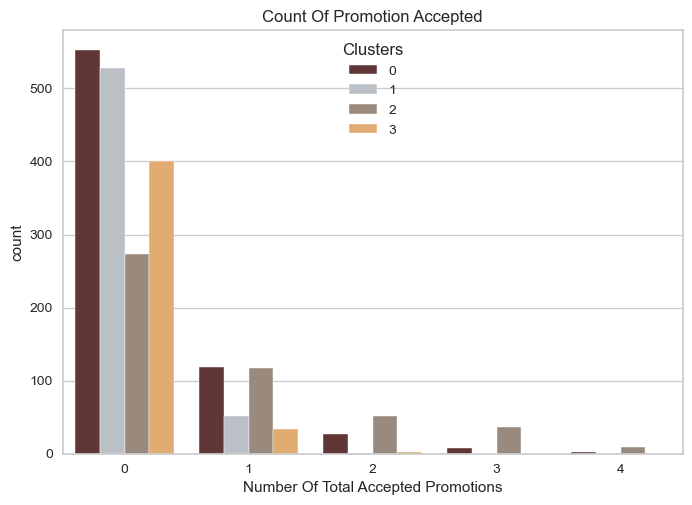

In [55]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ \
                       data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

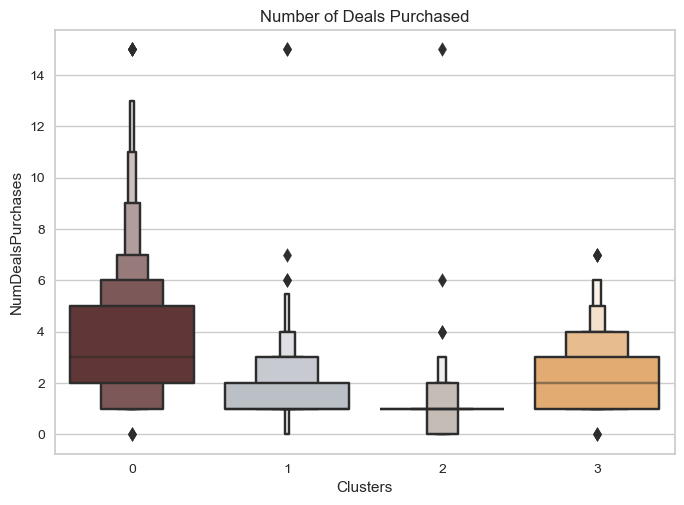

In [56]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

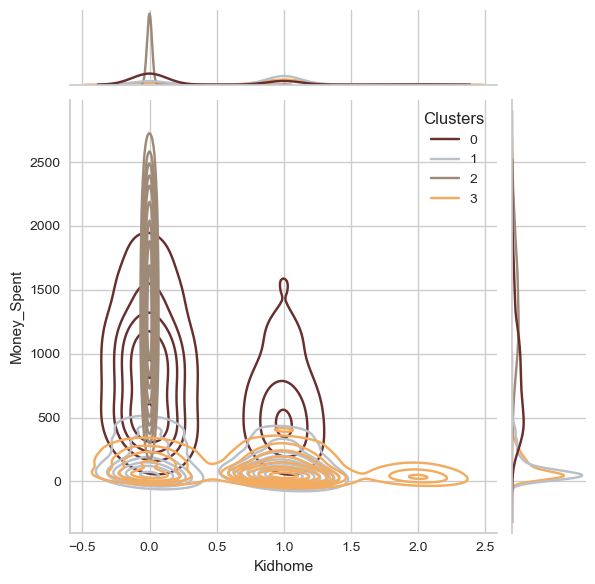

<Figure size 800x550 with 0 Axes>

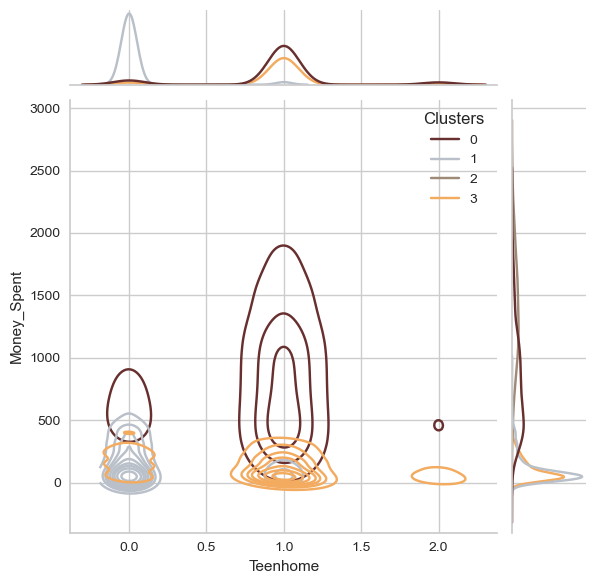

<Figure size 800x550 with 0 Axes>

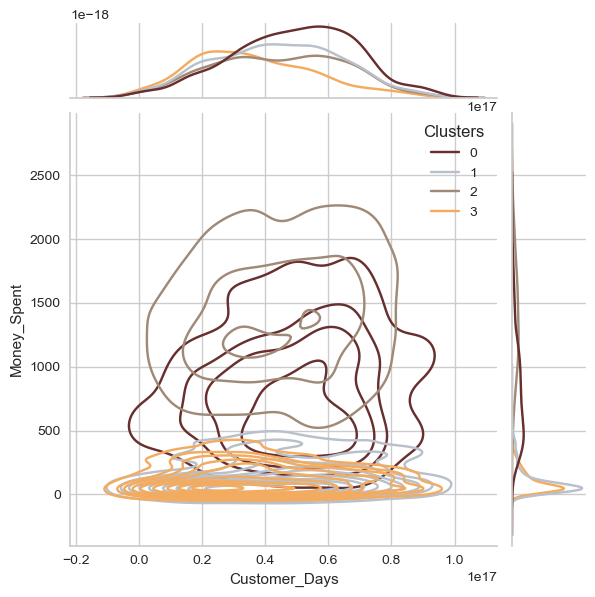

<Figure size 800x550 with 0 Axes>

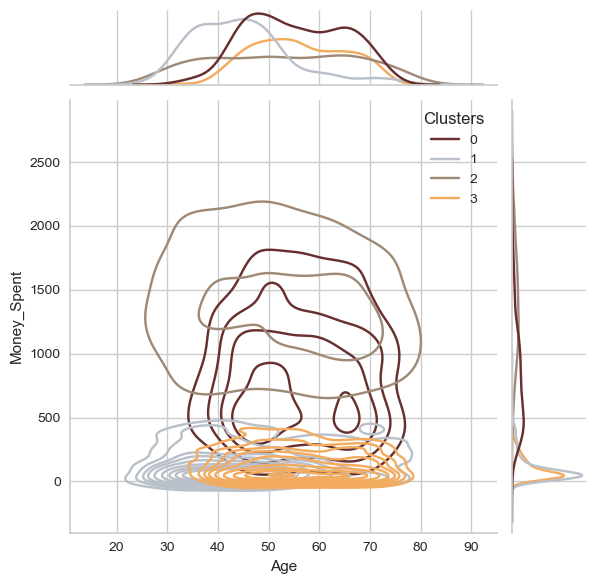

<Figure size 800x550 with 0 Axes>

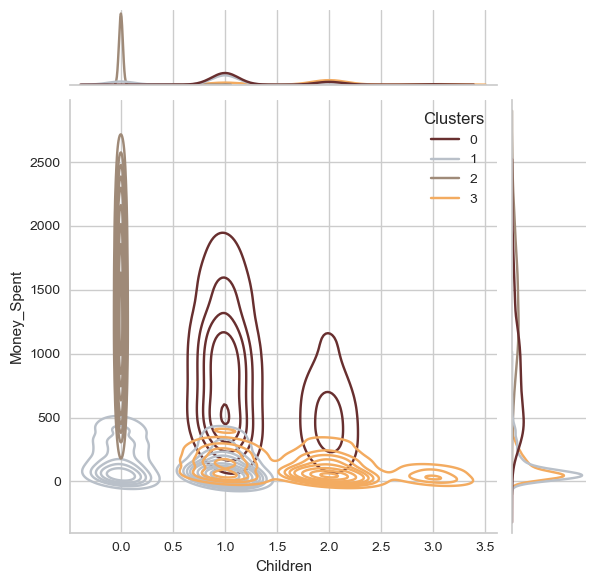

<Figure size 800x550 with 0 Axes>

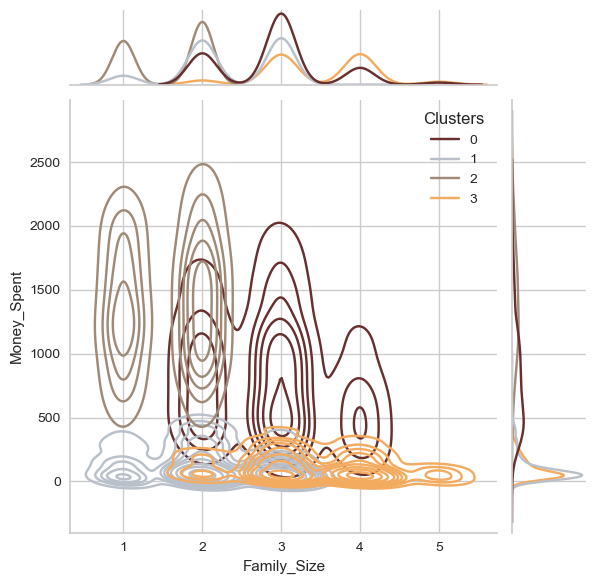

<Figure size 800x550 with 0 Axes>

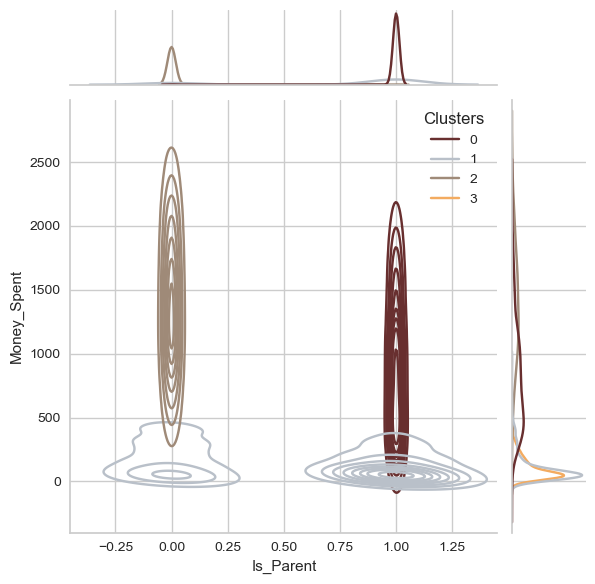

<Figure size 800x550 with 0 Axes>

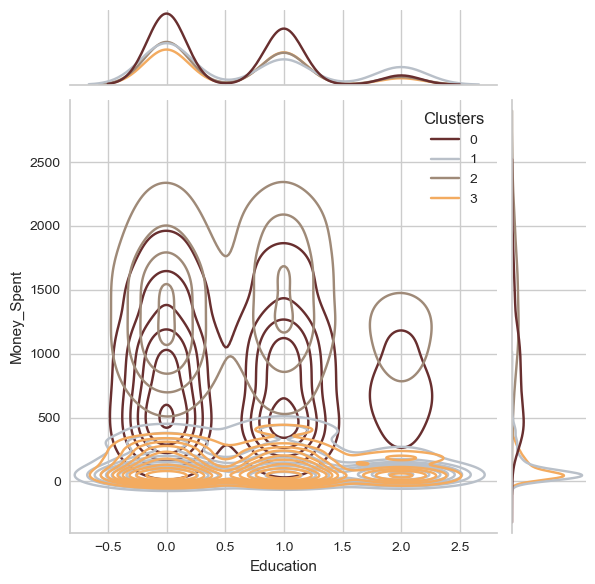

<Figure size 800x550 with 0 Axes>

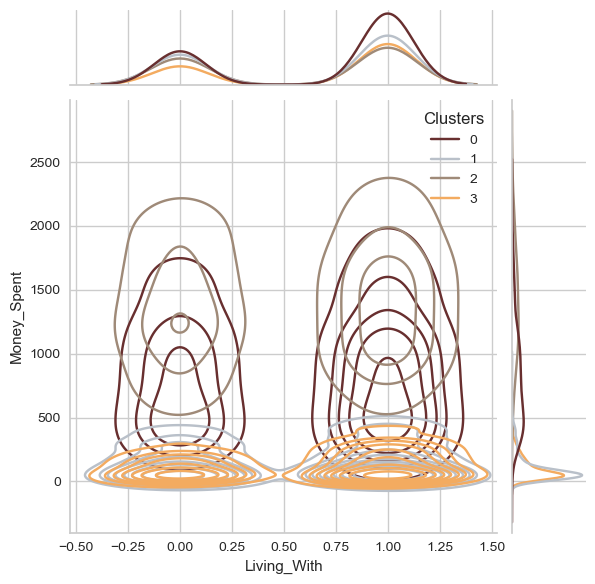

In [57]:
Personal = [ "Kidhome","Teenhome","Customer_Days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Money_Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()